In [1]:
!pip install psycopg2
!pip install psycopg2 binary
import psycopg2

hostname = 'localhost'
db = 'yashviz_pr'
username = 'postgres'
pwd = 'yps.pg'
port_id = 5432
conn = None
cur = None

#establishing the connection
try:
  conn = psycopg2.connect(
            dbname = db, 
            user = username,
            password = pwd, 
            host = hostname, 
            port = port_id)
  
  cur = conn.cursor()

except Exception as error:
  print(error)

#closing the connection
finally:
  if cur is not None:
    cur.close()
  if conn is not None:
    conn.close() 

could not connect to server: Connection refused
	Is the server running on host "localhost" (127.0.0.1) and accepting
	TCP/IP connections on port 5432?
could not connect to server: Cannot assign requested address
	Is the server running on host "localhost" (::1) and accepting
	TCP/IP connections on port 5432?



/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
!pip install pytrends
!pip install matplotlib 
!pip install numpy
!pip install pandas 

import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=0474928bb0e8d114258c73f40cf0e6d1c5e7f7a44c6e89d441326dc76dfc38e3
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [3]:
from pytrends.request import TrendReq
pytrend = TrendReq()

In [20]:
plt.style.use('ggplot')
pytrends = TrendReq(hl='en-US')

kw_list = list(map(str, input("Enter the keywords: ").split()))
print("List of keywords: ", kw_list)

pytrend.build_payload(kw_list)

# -------------------------Interest by Region-------------------------
df = pytrend.interest_by_region()
df.head(25)

# df.to_csv(r'C:Users\yashv\Desktop\Trends.csv', header = True)

Enter the keywords: tea coffee water
List of keywords:  ['tea', 'coffee', 'water']


,tea,coffee,water
geoName,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
American Samoa,0,0,0
Andorra,0,0,0
Angola,0,0,0
Anguilla,0,0,0
Antarctica,0,0,0
Antigua & Barbuda,0,0,0


In [21]:
data = pd.DataFrame(df)
print(data)

                tea  coffee  water
geoName                           
Afghanistan       0       0      0
Albania           0       0      0
Algeria           0       0      0
American Samoa    0       0      0
Andorra           0       0      0
...             ...     ...    ...
Western Sahara    0       0      0
Yemen             0       0      0
Zambia            0       0      0
Zimbabwe          0       0      0
Åland Islands     0       0      0

[250 rows x 3 columns]


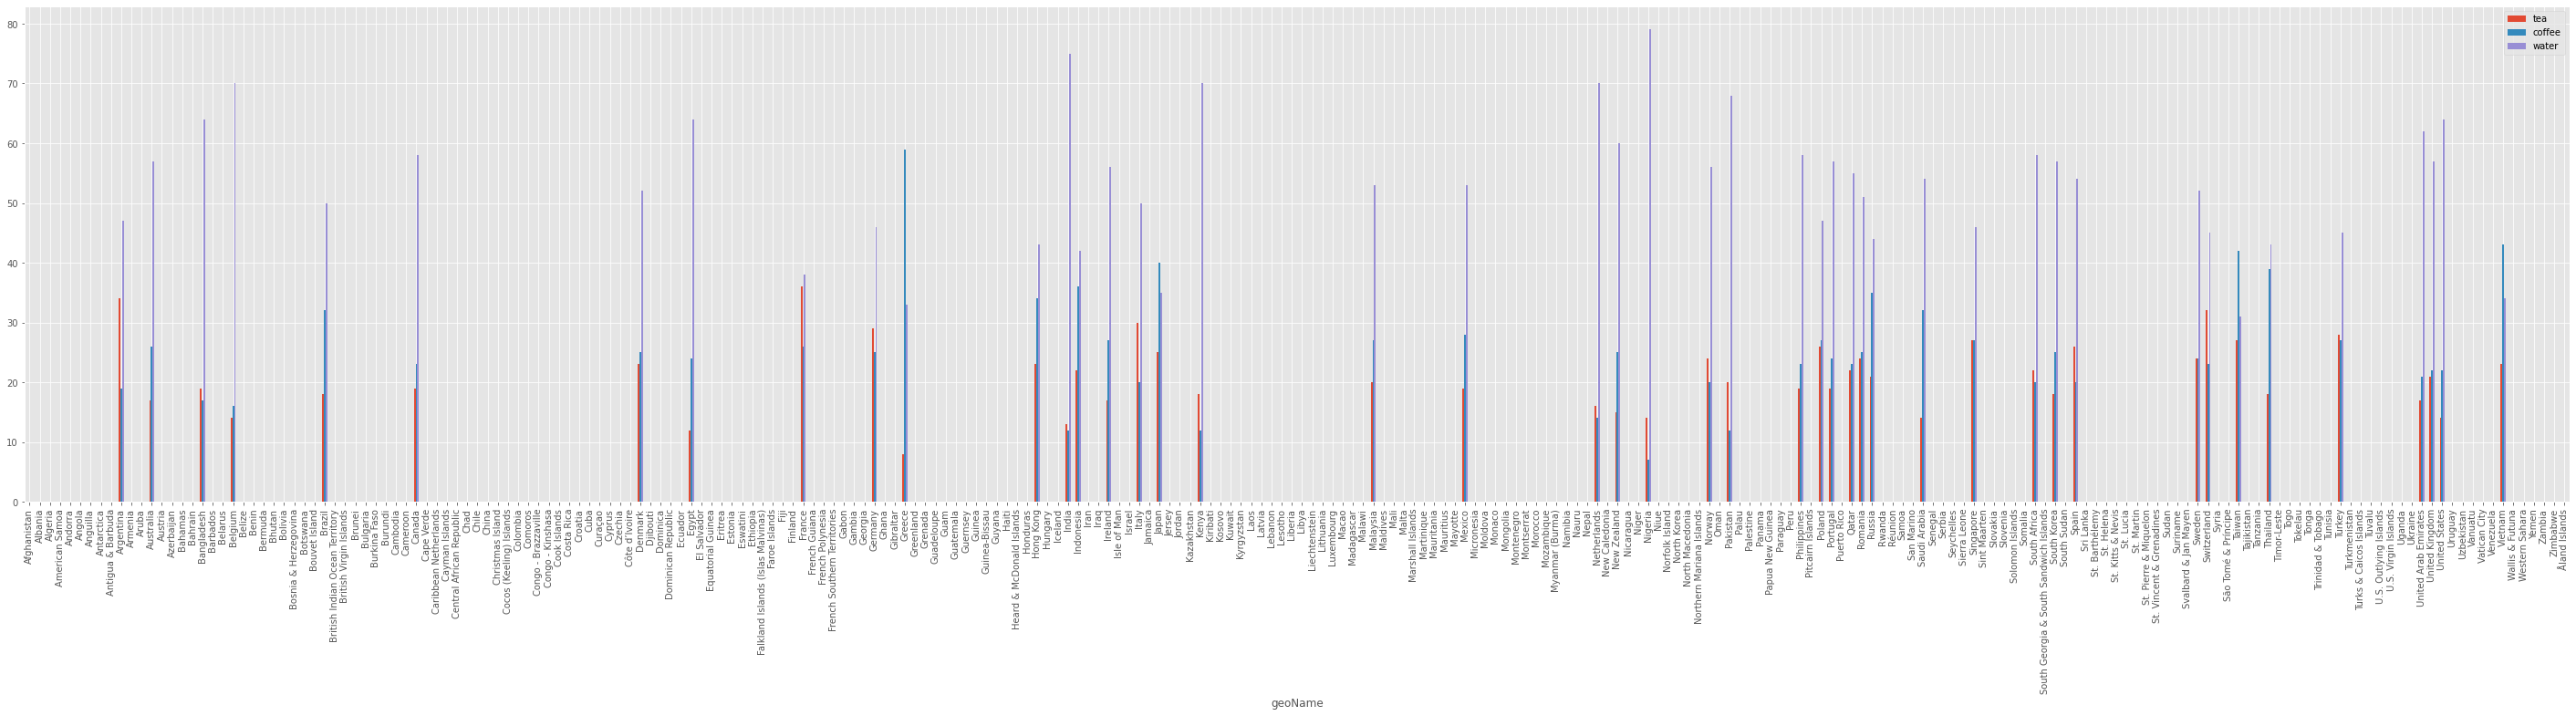

In [22]:
df.reset_index().plot(x='geoName', y=kw_list, figsize=(50, 10), kind ='bar')

In [23]:
keywords = []

## -------------------------Interest over time-------------------------

timeframes = ['today 5-y', 'today 12-m', 
              'today 3-m', 'today 1-m']
cat = '0'

#Part 1 - Google trends analysis
def check_trends():
  pytrends.build_payload(kw_list, 
                        cat, 
                        timeframes[0], 
                        geo = '', 
                        gprop = '')
  
  data = pytrends.interest_over_time()
  mean = round(data.mean(),2)
  avg = round(data[kw][-52:].mean(),2)
  avg2 = round(data[kw][:52].mean(),2)
  trend = round(((avg/mean[kw])-1)*100,2)
  trend2 = round(((avg2/avg)-1)*100,2)
  print('The average 5 years interest of ' + kw + ' was ' + str(mean[kw]) + '.')
  print('The last year interest of ' + kw + ' compared to the last 5 years'  + ' has changed by ' + str(trend)+ '%.')

  #Stable trend

  if mean[kw] > 75 and abs(trend) <= 5:
    print('The interest for ' + kw + ' is stable in the last 5 years.')
  elif mean[kw] > 75 and trend > 5:
    print('The interest for ' + kw + ' is stable and increasing in the last 5 years.')
  elif mean[kw] > 75 and trend < -5:
    print('The interest for ' + kw + ' is stable and decreasing in the last 5 years.')

  #Relatively stable

  elif mean[kw] > 60 and abs(trend) <= 15:
    print('The interest for ' + kw + ' is relatively stable in the last 5 years.')
  elif mean[kw] > 60 and trend > 15:
    print('The interest for ' + kw + ' is relatively stable and increasing in the last 5 years.')
  elif mean[kw] > 60 and trend < -15:
    print('The interest for ' + kw + ' is relatively stable and decreasing in the last 5 years.')

  #Seasonal
  elif mean[kw] > 20 and abs(trend) <= 15:
    print('The interest for ' + kw + ' is seasonal.')

  #New keyword
  elif mean[kw] > 20 and trend > 15:
    print('The interest for ' + kw + ' is trending.')

  #Declining keyword
  elif mean[kw] > 20 and trend < -15:
    print('The interest for ' + kw + ' is significantly decreasing.')

  #Cyclinal
  elif mean[kw] > 5 and abs(trend) <= 15:
    print('The interest for ' + kw + ' is cyclical.')

  #New
  elif mean[kw] > 0 and trend > 15:
    print('The interest for ' + kw + ' is new and trending.')

  #Declining
  elif mean[kw] > 0 and trend < -15:
    print('The interest for ' + kw + ' is declining and not comparable to its peak.')

  #Other
  else:
    print('This is something to be checked.')

  #Comparison last year vs. 5 years ago

  if avg2 == 0:
    print('This didn\'t exist 5 years ago.')
  elif trend2 > 15:
    print('The last year interest is quite higher compared to 5 years ago.' + ' It has increased by ' + str(trend2)+ '%.')
  elif trend2 < -15:
    print('The last year interest is quite lower compared to 5 years ago.' + ' It has decreased by ' + str(trend2)+ '%.')
  else:
    print('The last year interest is comparable to 5 years ago.' + ' It has changed by ' + str(trend2)+ '%.')
  print('')


for kw in kw_list:
  keywords.append(kw)
  check_trends()
  keywords.pop()

The average 5 years interest of tea was 22.21.
The last year interest of tea compared to the last 5 years has changed by 3.2%.
The interest for tea is seasonal.
The last year interest is comparable to 5 years ago. It has changed by -9.55%.

The average 5 years interest of coffee was 28.91.
The last year interest of coffee compared to the last 5 years has changed by 7.16%.
The interest for coffee is seasonal.
The last year interest is quite lower compared to 5 years ago. It has decreased by -15.53%.

The average 5 years interest of water was 79.24.
The last year interest of water compared to the last 5 years has changed by 2.06%.
The interest for water is stable in the last 5 years.
The last year interest is comparable to 5 years ago. It has changed by -4.81%.



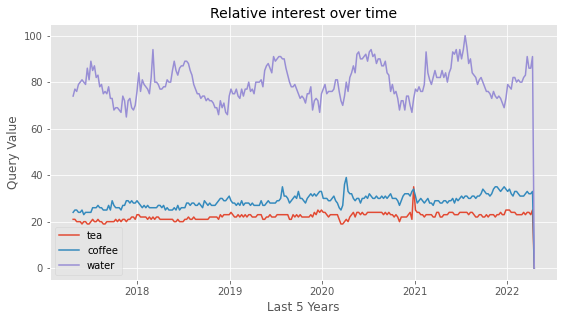

<Figure size 1584x1296 with 0 Axes>

In [31]:
#Part 2 - Relative keyword comparison    
def relative_comparison():

  #Last 5-years
  plt.figure(figsize = (20,16))
  pytrends.build_payload(kw_list, 
                         cat, 
                         timeframes[0], 
                         geo = '', 
                         gprop = '')
  
  data = pytrends.interest_over_time()
  mean = data.mean()
  ax1 = plt.subplot2grid((3,2), (0,0), rowspan = 1, colspan = 1)

  for kw in kw_list:
    ax1.plot(data[kw], label = kw)
     
  #plt.xticks(x_pos, kw_list)
  plt.figure(figsize = (22,18))
  ax1.set_ylabel('Query Value')
  ax1.set_xlabel('Last 5 Years')
  ax1.set_title('Relative interest over time', fontsize = 14)
  
  ax1.legend()
  plt.show()

relative_comparison()

In [30]:
#Part 3 - Get Google Hot Trends data
df = pytrend.trending_searches(pn='india')
df.head()

,0
0,Cristiano Ronaldo
1,Barcelona vs Cádiz
2,Napoli vs Roma
3,RR vs KKR
4,KKR vs RR


In [10]:
#Part 4 - Trending searches
def trending_searches(country):
    data = pytrends.trending_searches(country)
    print(data.head(5))

countries = ['india', 'united_states', 'united_kingdom',
             'netherlands', 'brazil']

for country in countries:
    print(country)
    print('')
    trending_searches(country)
    print('')

india

                    0
0   Cristiano Ronaldo
1  Barcelona vs cádiz
2      Napoli vs Roma
3           RR vs KKR
4          Obed McCoy

united_states

                        0
0                     IRS
1                TurboTax
2  Thor: Love and Thunder
3              The Batman
4       Cristiano Ronaldo

united_kingdom

                         0
0  EastEnders Sam Mitchell
1       Boris Johnson news
2        Cristiano Ronaldo
3    John Darwin canoe man
4             Derby County

netherlands

                     0
0  Frans van Drimmelen
1    Cristiano Ronaldo
2     Barcelona  Cádiz
3           The Batman
4         Ajax Vrouwen

brazil

                        0
0               Barcelona
1       Cristiano Ronaldo
2  Thor: Love and Thunder
3                  Napoli
4            Dia das Mães



In [12]:
#Part 5 - Get Google Trends year and timezonewise 
df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='IN')
df.head(10)

,title,exploreQuery
0,Cricket World Cup,
1,Lok Sabha Elections,
2,Chandrayaan 2,
3,Kabir Singh,
4,Avengers: Endgame,
5,Article 370,
6,NEET results,
7,Joker,
8,Captain Marvel,
9,PM Kisan Yojana,


In [13]:
#Part 6 - Get Google Keyword Suggestions
key = input("Enter the keyword for suggestion : ")
keywords = pytrend.suggestions(key)
df = pd.DataFrame(keywords)
print('Suggestions for', key, 'are: ')
df.drop(columns= 'mid')


Enter the keyword for suggestion : red
Suggestions for red are: 


,title,type
0,Reddit,Website
1,Malcolm X,African-American minister
2,Manchester United F.C.,Football club
3,Red,Color
4,Washington Commanders,American football team


In [14]:
pytrend.build_payload(kw_list)

In [15]:
#Part 7 - Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                     query  value
0                 red sox    100
1     red dead redemption     83
2               red light     71
3                red bull     68
4   red dead redemption 2     67
5              red velvet     60
6                red wine     55
7            red red wine     55
8                  la red     47
9             red lobster     46
10               red hair     45
11              red cross     41
12              color red     36
13              red dress     35
14               red deer     34
15              red robin     31
16                big red     31
17              red shoes     29
18              red movie     28
19                red eye     25
20            pokemon red     24
21             red voznje     24
22               red card     24
23               red rock     23
24               red eyes     22, 'rising':                                  query  value
0                       red table talk   8300
1                r